In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('qconlondon2016_sample_data.csv')

In [4]:
data.head()

,fraudulent,charge_time,amount,card_country,card_use_24h
0,False,2015-12-31T23:59:59Z,20484,US,0
1,False,2015-12-31T23:59:59Z,1211,US,0
2,False,2015-12-31T23:59:59Z,8396,US,1
3,False,2015-12-31T23:59:59Z,2359,US,0
4,False,2015-12-31T23:59:59Z,1480,US,3


In [5]:
data.fraudulent.value_counts()

False    45174
True     44219
Name: fraudulent, dtype: int64

In [6]:
data.card_country.value_counts()

US    84494
GB     2754
AU     2145
Name: card_country, dtype: int64

In [7]:
encoded_countries = pd.get_dummies(data.card_country, prefix='cc_')

In [8]:
encoded_countries.head()

,cc__AU,cc__GB,cc__US
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [9]:
data = data.join(encoded_countries)

In [10]:
data.head()

,fraudulent,charge_time,amount,card_country,card_use_24h,cc__AU,cc__GB,cc__US
0,False,2015-12-31T23:59:59Z,20484,US,0,0,0,1
1,False,2015-12-31T23:59:59Z,1211,US,0,0,0,1
2,False,2015-12-31T23:59:59Z,8396,US,1,0,0,1
3,False,2015-12-31T23:59:59Z,2359,US,0,0,0,1
4,False,2015-12-31T23:59:59Z,1480,US,3,0,0,1


In [11]:
y = data.fraudulent

In [12]:
X = data[['amount', 'card_use_24h', 'cc__AU', 'cc__GB']]

In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [16]:
lr_model = LogisticRegression().fit(X_train, y_train)

In [17]:
lr_model.coef_

array([[  4.81276839e-06,   2.36468138e-02,   1.21776100e-03,
          7.84385288e-04]])

In [18]:
lr_model.intercept_

array([-0.00378496])

In [19]:
y_test_predict_lr = lr_model.predict_proba(X_test)

In [20]:
lr_model.classes_

array([False,  True], dtype=bool)

In [21]:
y_test_predict_lr

array([[ 0.48863551,  0.51136449],
       [ 0.48045414,  0.51954586],
       [ 0.49755085,  0.50244915],
       ..., 
       [ 0.48520956,  0.51479044],
       [ 0.49709365,  0.50290635],
       [ 0.48343377,  0.51656623]])

In [22]:
y_test_scores_lr = [x[1] for x in y_test_predict_lr]

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores_lr)

In [25]:
fpr[len(fpr)/2], tpr[len(tpr)/2], thresholds[len(thresholds)/2]

(0.37411749034234715, 0.68093331492475495, 0.51383466612652107)

In [26]:
from matplotlib import pyplot

In [27]:
import numpy as np

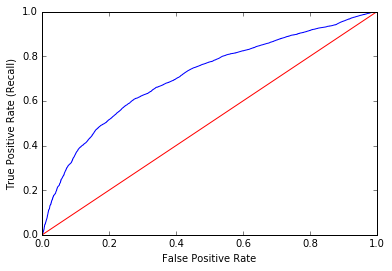

In [28]:
pyplot.plot(fpr, tpr, color='b')
pyplot.plot(np.linspace(0, 1, 11), np.linspace(0, 1, 11), color='r')
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate (Recall)")

In [29]:
roc_auc_score(y_test, y_test_scores_lr)

0.70995597399167287

In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_model = DecisionTreeClassifier(
    max_depth=3, min_samples_split=20).fit(X_train, y_train)

In [32]:
y_test_scores_dt = [x[1] for x in dt_model.predict_proba(X_test)]

In [33]:
roc_auc_score(y_test, y_test_scores_dt)

0.69850327553825653

In [34]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_model = RandomForestClassifier(
    n_estimators=100, min_samples_leaf=100).fit(X_train, y_train)

In [36]:
y_test_scores_rf = [x[1] for x in rf_model.predict_proba(X_test)]

In [37]:
roc_auc_score(y_test, y_test_scores_rf)

0.738136559221518

In [38]:
# We can get a visualization of the decision tree
from sklearn.tree import export_graphviz

In [39]:
# To get the visualization, install GraphViz (on Mac OS, `brew install graphviz`)
# and run `dot -Tpng tree.dot -o tree.png`
export_graphviz(dt_model, 'tree.dot', feature_names=X.columns)

In [44]:
# Plotting a sigmoid function (inverse of the logit function)
import numpy as np
p = lambda L: (np.exp(0.5+L)/(1 + np.exp(0.5+L)))

In [46]:
x = np.linspace(-5, 5, 100)

In [45]:
y = map(p, x)

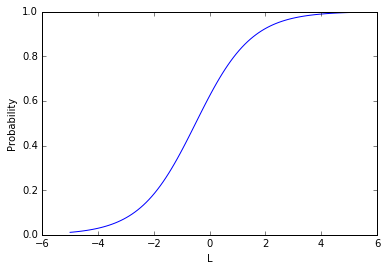

In [47]:
pyplot.plot(x, y)
pyplot.xlabel('L')
pyplot.ylabel('Probability')